In [273]:
# A virtual environment was created for this project, importing pandas, matplotlib, seaborn and numpy to run this notebook
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
pd.set_option('display.max_columns', None)# To show all columns

In [274]:
traffic_accidents = pd.read_csv('datos_madrid.csv', encoding='latin-1')
traffic_accidents.head()

,num_expediente,fecha,hora,localizacion,numero,cod_distrito,distrito,tipo_accidente,estado_meteorolgico,tipo_vehiculo,tipo_persona,rango_edad,sexo,cod_lesividad,lesividad,coordenada_x_utm,coordenada_y_utm,positiva_alcohol,positiva_droga
0,2018S017842,4/02/2019,9:10:00 a.Êm.,"CALL. ALBERTO AGUILERA, 1",1,1.0,CENTRO,Colisin lateral,Despejado,Motocicleta > 125cc,Conductor,De 45 a 49 aos,Hombre,7,Asistencia sanitaria slo en el lugar del acci...,440068.049,4475679.170,N,0
1,2018S017842,4/02/2019,9:10:00 a.Êm.,"CALL. ALBERTO AGUILERA, 1",1,1.0,CENTRO,Colisin lateral,Despejado,Turismo,Conductor,De 30 a 34 aos,Mujer,7,Asistencia sanitaria slo en el lugar del acci...,440068.049,4475679.170,N,0
2,2019S000001,1/01/2019,3:45:00 a.Êm.,PASEO. SANTA MARIA DE LA CABEZA / PLAZA. ELIPTICA,168,11.0,CARABANCHEL,Alcance,No se registr,Furgoneta,Conductor,De 40 a 44 aos,Hombre,0,No se registr,439139.603,4470836.854,S,0
3,2019S000001,1/01/2019,3:45:00 a.Êm.,PASEO. SANTA MARIA DE LA CABEZA / PLAZA. ELIPTICA,168,11.0,CARABANCHEL,Alcance,No se registr,Turismo,Conductor,De 40 a 44 aos,Mujer,0,No se registr,439139.603,4470836.854,N,0
4,2019S000001,1/01/2019,3:45:00 a.Êm.,PASEO. SANTA MARIA DE LA CABEZA / PLAZA. ELIPTICA,168,11.0,CARABANCHEL,Alcance,No se registr,Turismo,Conductor,De 45 a 49 aos,Mujer,0,No se registr,439139.603,4470836.854,N,0


In [275]:
# identify the enconding
# import sys
# print(sys.executable)
# !{sys.executable} -m pip install chardet

# import chardet
# with open('datos_madrid.csv', 'rb') as f:
#     result = chardet.detect(f.read(10000)) 

# print(result)

##### {'encoding': 'Windows-1252', 'confidence': 0.73, 'language': ''}
Nevertheless, when this encoding was tested still there were corrupted characters

In [276]:
traffic_accidents.columns

Index(['num_expediente', 'fecha', 'hora', 'localizacion', 'numero',
       'cod_distrito', 'distrito', 'tipo_accidente', 'estado_meteorolgico',
       'tipo_vehiculo', 'tipo_persona', 'rango_edad', 'sexo', 'cod_lesividad',
       'lesividad', 'coordenada_x_utm', 'coordenada_y_utm', 'positiva_alcohol',
       'positiva_droga'],
      dtype='object')

In [277]:
# Use only usefull columns
df = traffic_accidents[['num_expediente', 'fecha', 'hora','distrito', 'tipo_accidente', 'estado_meteorolgico',
       'tipo_vehiculo', 'tipo_persona', 'rango_edad', 'sexo',
       'lesividad', 'coordenada_x_utm', 'coordenada_y_utm', 'positiva_alcohol',
       'positiva_droga']]


In [278]:
print('------Data Types-------')
print(df.dtypes)
print('\n------DataFrame Info-------')
print(df.info())

------Data Types-------
num_expediente           object
fecha                    object
hora                     object
distrito                 object
tipo_accidente           object
estado_meteorolgico     object
tipo_vehiculo            object
tipo_persona             object
rango_edad               object
sexo                     object
lesividad                object
coordenada_x_utm        float64
coordenada_y_utm        float64
positiva_alcohol         object
positiva_droga            int64
dtype: object

------DataFrame Info-------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 221910 entries, 0 to 221909
Data columns (total 15 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   num_expediente        221910 non-null  object 
 1   fecha                 221910 non-null  object 
 2   hora                  221910 non-null  object 
 3   distrito              221902 non-null  object 
 4   tipo_accidente        221

#### Basic Formatting

In [279]:
#check counts of categorical variables
def print_value_counts(df, columns):
    """
    Prints the unique value counts for each column specified in the DataFrame
    """
    for col in columns:
        print(f"\n---- Value Counts for '{col}'----")
        print(df[col].value_counts(dropna=False))

cols_to_count = ['distrito', 'hora','tipo_accidente', 'estado_meteorolgico',
       'tipo_vehiculo', 'tipo_persona', 'rango_edad', 'sexo',
       'lesividad', 'positiva_alcohol',
       'positiva_droga']
print_value_counts(df, cols_to_count)


---- Value Counts for 'distrito'----
distrito
PUENTE DE VALLECAS     17537
SALAMANCA              16286
CHAMARTêN              15429
CIUDAD LINEAL          14676
CARABANCHEL            14324
CENTRO                 11906
MONCLOA-ARAVACA        11754
FUENCARRAL-EL PARDO    11715
SAN BLAS-CANILLEJAS    11569
RETIRO                 11252
CHAMBERê               10656
LATINA                 10642
ARGANZUELA              9970
TETUçN                  9607
USERA                   8924
HORTALEZA               8701
VILLAVERDE              7073
MORATALAZ               6252
VILLA DE VALLECAS       5980
BARAJAS                 4039
VICçLVARO               3610
NaN                        8
Name: count, dtype: int64

---- Value Counts for 'hora'----
hora
6:00:00 p.Êm.    1952
6:30:00 p.Êm.    1886
7:00:00 p.Êm.    1885
2:30:00 p.Êm.    1885
4:00:00 p.Êm.    1850
                 ... 
5:56:00 a.Êm.       1
4:51:00 a.Êm.       1
5:42:00 a.Êm.       1
4:31:00 a.Êm.       1
2:49:00 a.Êm.       1
Name: co

In [280]:
# Typo fix for 'distrito'
distrito_replacements = {
    'CHAMARTêN': 'Chamartín',
    'CHAMBERê': 'Chamberí',
    'TETUçN': 'Tetuán',
    'VICçLVARO': 'Vicálvaro'
}
df.loc[:, 'distrito'] = df['distrito'].replace(distrito_replacements)
df.loc[:, 'distrito'] = df['distrito'].str.title()



# Typo fix for 'tipo_accidente'
tipo_accidente_replacements = {
    'Colisin fronto-lateral' : 'Colisión fronto-lateral',
    'Colisin lateral' : 'Colisión lateral',
    'Choque contra obstculo fijo' : 'Choque contra obstáculo fijo',
    'Colisin mltiple' : 'Colisión multiple',
    'Cada' : 'Caída',
    'Colisin frontal': 'Colisión frontal',
    'Solo salida de la va' : 'Solo salida de la vía',
    'Despeamiento' : 'Despeñamiento'
}

df.loc[:, 'tipo_accidente'] = df['tipo_accidente'].replace(tipo_accidente_replacements)


# Typo fix for 'condiciones_meteorologicas'
df = df.rename(columns={'estado_meteorolgico' : 'condiciones_meteorológicas'})

condiciones_replacements = {
    'No se registr' : 'No registrado',
    'Lluvia dbil' : 'Lluvia débil',
    'Se desconoce': 'No registrado',
}
df.loc[:, 'condiciones_meteorológicas'] = df['condiciones_meteorológicas'].replace(condiciones_replacements)

# Typo fix for 'tipo_vehiculo'
tipo_vehiculo_replacements = {
    'Autobs' : 'Autobús',
    'Camin rgido' : 'Camión rígido',
    'VMU elctrico' : 'VMU eléctrico',
    'Otros vehculos con motor' : 'Otros vehículos con motor',
    'Tractocamin' : 'Tractocamión',
    'Autobs articulado' : 'Autobús articulado',
    'Vehculo articulado' : 'Vehículo articulado',
    'Otros vehculos sin motor' : 'Otros vehículos sin motor',
    'Patinete no elctrico' : 'Patinete no eléctrico',
    'Camin de bomberos' : 'Camión de bomberos',
    'Autobs articulado EMT' : 'Autobús articulado EMT',
    'Maquinaria agrcola' : 'Maquinaria agrícola',
    'Microbs' : 'Microbús',
    'Tranva' : 'Tranvía',
    'Microbs <= 17 plazas' : 'Microbús <= 17 plazas'
}
df.loc[:, 'tipo_vehiculo'] = df['tipo_vehiculo'].replace(tipo_vehiculo_replacements)





# Typo fix for 'lesividad'
lesividad_replacements = {
    'No se registr': 'Se desconoce',
    'Asistencia sanitaria slo en el lugar del accidente' : 'Asistencia sanitaria sólo en el lugar del accidente',
    'Atencin en urgencias sin posterior ingreso': 'Atención en urgencias sin posterior ingreso'
}
df.loc[:, 'lesividad'] = df['lesividad'].replace(lesividad_replacements)



# Typo fix for 'tipo_persona'
df['tipo_persona'] = df['tipo_persona'].replace('Peatn', 'Peatón')

# Typo fix for 'rango_edad'

replacements = {
    'De 40 a 44 aos': '40 - 44',
    'De 25 a 29 aos': '25 - 29',
    'De 30 a 34 aos': '30 - 34',
    'De 35 a 39 aos': '35 - 39',
    'De 45 a 49 aos': '45 - 49',
    'De 50 a 54 aos': '50 - 54',
    'De 21 a 24 aos': '21 - 24',
    'De 55 a 59 aos': '55 - 59',
    'De 60 a 64 aos': '60 - 64',
    'De 18 a 20 aos': '18 - 20',
    'Ms de 74 aos': '75+',
    'De 65 a 69 aos': '65 - 69',
    'De 70 a 74 aos': '70 - 74',
    'Menor de 5 aos': '0 - 4',
    'De 10 a 14 aos': '10 - 14',
    'De 15 a 17 aos': '15 - 17',
    'De 6 a 9 aos': '6 - 9',
    'Desconocido': 'Desconocido'
}
df['rango_edad'] = df['rango_edad'].replace(replacements)

# # Typo fix for 'hora'
# hora_replacements = {
#     'a.Êm.': 'am',
#     'p.Êm.': 'pm'
# }
# df.loc[:, 'hora'] = df['hora'].replace(hora_replacements, regex=False)
# df.loc[:, 'hora_24h'] = pd.to_datetime(df['hora'], format='%I:%M:%S %p').dt.strftime('%H:%M')
# df = df.drop('hora', axis=1)


# #Typo fix for 'fecha'

# df.loc[:, 'fecha'] = pd.to_datetime(df['fecha'], format='%d/%m/%Y', errors='coerce')



# Typo fix for 'hora'

df.loc[:, 'hora'] = df['hora'].str.replace('a.Êm.', 'am', regex=False)
df.loc[:, 'hora'] = df['hora'].str.replace('p.Êm.', 'pm', regex=False)
df.loc[:, 'hora_24h'] = pd.to_datetime(df['hora'], format='%I:%M:%S %p').dt.strftime('%H:%M')
df.drop('hora',inplace=True, axis=1)

#Typo fix for 'fecha'
df.loc[:, 'fecha'] = pd.to_datetime(df['fecha'], format='%d/%m/%Y')


In [323]:
#Merge date and time columns
df["fecha"] = pd.to_datetime(df["fecha"], errors="coerce")

df["fecha_hora"] = pd.to_datetime(
    df["fecha"].dt.strftime("%Y-%m-%d") + " " + df["hora_24h"],
    format="%Y-%m-%d %H:%M",
    errors="coerce"
)
df.dtypes

num_expediente                        object
fecha                         datetime64[ns]
distrito                              object
tipo_accidente                        object
condiciones_meteorológicas            object
tipo_vehiculo                         object
tipo_persona                          object
rango_edad                            object
sexo                                  object
lesividad                             object
coordenada_x_utm                     float64
coordenada_y_utm                     float64
hora_24h                              object
fecha_hora                    datetime64[ns]
drogas_test                           object
alcohol_test                          object
dtype: object

#### Duplicate Management

In [282]:
df.duplicated().sum()
duplicates = df[df.duplicated(keep=False)]
print(duplicates)

       num_expediente      fecha            distrito  \
10        2019S000002 2019-01-01              Latina   
11        2019S000002 2019-01-01              Latina   
19        2019S000006 2019-01-01         Carabanchel   
20        2019S000006 2019-01-01         Carabanchel   
22        2019S000007 2019-01-01           Moratalaz   
...               ...        ...                 ...   
221819    2023S040226 2023-12-31  Puente De Vallecas   
221873    2023S040256 2023-12-31       Ciudad Lineal   
221874    2023S040256 2023-12-31       Ciudad Lineal   
221875    2023S040256 2023-12-31       Ciudad Lineal   
221876    2023S040256 2023-12-31       Ciudad Lineal   

                      tipo_accidente condiciones_meteorológicas tipo_vehiculo  \
10      Choque contra obstáculo fijo                  Despejado       Turismo   
11      Choque contra obstáculo fijo                  Despejado       Turismo   
19      Choque contra obstáculo fijo                  Despejado       Turismo   
20 

In [283]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

np.int64(0)

#### Missing Values management

In [284]:
df.isna().sum()

num_expediente                  0
fecha                           0
distrito                        8
tipo_accidente                  4
condiciones_meteorológicas      0
tipo_vehiculo                 937
tipo_persona                    3
rango_edad                      0
sexo                            0
lesividad                       0
coordenada_x_utm               38
coordenada_y_utm               38
positiva_alcohol              781
positiva_droga                  0
hora_24h                        0
fecha_hora                      0
dtype: int64

In [285]:
# Replace NaN in distrito using the most frequent category
mode = df['distrito'].mode()[0]
mask = df['distrito'].isna()
df.loc[mask, 'distrito'] = mode

# Replace NaN in distrito using the most frequent category
mode_acc = df['tipo_accidente'].mode()[0]
mask = df['tipo_accidente'].isna()
df.loc[mask, 'tipo_accidente'] = mode_acc

# Drop this registers with a lot of missing values (only 3 registers)
df[df['tipo_persona'].isna()]
df.dropna(subset=['tipo_persona'], inplace=True)

# Replace NaN in tipo_vehiculo using the most frequent category
mode_vehicle = df['tipo_vehiculo'].mode()[0]
mask = df['tipo_vehiculo'].isna()
df.loc[mask, 'tipo_vehiculo'] = mode_vehicle

# Replace NaN in tipo_vehiculo using the most frequent category
mode_alcohol = df['positiva_alcohol'].mode()[0]
mask = df['positiva_alcohol'].isna()
df.loc[mask, 'positiva_alcohol'] = mode_alcohol
df.isna().sum()

num_expediente                 0
fecha                          0
distrito                       0
tipo_accidente                 0
condiciones_meteorológicas     0
tipo_vehiculo                  0
tipo_persona                   0
rango_edad                     0
sexo                           0
lesividad                      0
coordenada_x_utm              38
coordenada_y_utm              38
positiva_alcohol               0
positiva_droga                 0
hora_24h                       0
fecha_hora                     0
dtype: int64

#### Since it's only 38 registers without geograghic information I decided to keep theses NaN values in order to not lose those datapoints and not to affect GIS outputs

In [286]:
# Standardize format and data type for alcohol and drugs test

df['drogas_test'] = df['positiva_droga'].map({0: 'No', 1: 'Si'})
df['alcohol_test'] = df['positiva_alcohol'].map({'N': 'No', 'S': 'Si'})
cols_drop = ['positiva_alcohol', 'positiva_droga']
df = df.drop(cols_drop, axis=1)

In [287]:
# Remove white spaces
df["distrito"] = df["distrito"].astype(str).str.strip()
df["tipo_accidente"] = df["tipo_accidente"].astype(str).str.strip()
df["condiciones_meteorológicas"] = df["condiciones_meteorológicas"].astype(str).str.strip()
df["tipo_vehiculo"] = df["tipo_vehiculo"].astype(str).str.strip()
df["tipo_persona"] = df["tipo_persona"].astype(str).str.strip()
df["rango_edad"] = df["rango_edad"].astype(str).str.strip()
df["sexo"] = df["sexo"].astype(str).str.strip()
df["lesividad"] = df["lesividad"].astype(str).str.strip()
df["sexo"] = df["sexo"].astype(str).str.strip()


#### Create new ordered DataFrame

In [328]:
df_clean = df[['num_expediente', 'fecha','hora_24h','fecha_hora','distrito', 'tipo_accidente',
       'condiciones_meteorológicas', 'tipo_vehiculo', 'tipo_persona',
       'rango_edad', 'sexo', 'lesividad','alcohol_test', 'drogas_test','coordenada_x_utm',
       'coordenada_y_utm']]

In [329]:
# Save new dataframe
df_clean.to_csv("traffic_accidents_clean.csv", 
          index=False,           
          encoding='utf-8',      
          sep=',',               
          decimal='.'
         )

In [421]:
# Load new dataframe

df_traffic = pd.read_csv('traffic_accidents_clean.csv')
# df_traffic.isna().sum()
# df_traffic.dtypes

### Basic Visualizations

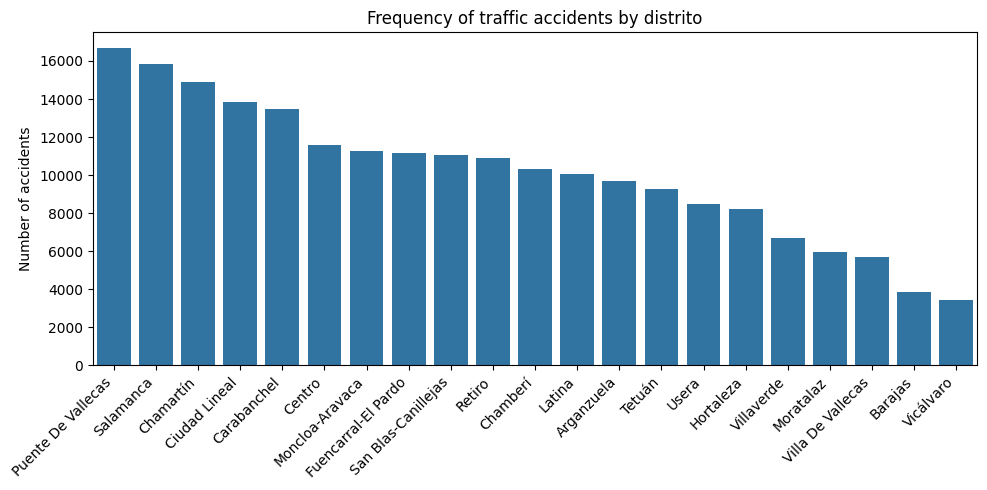

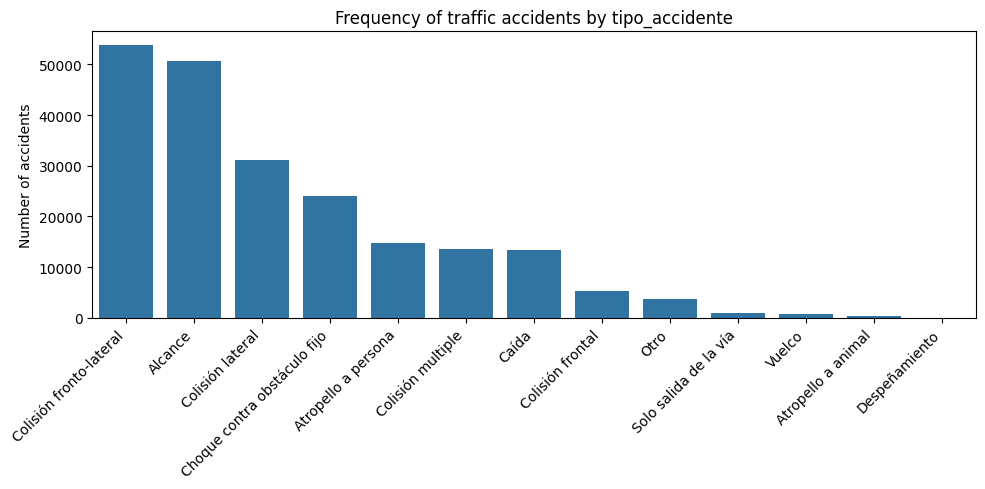

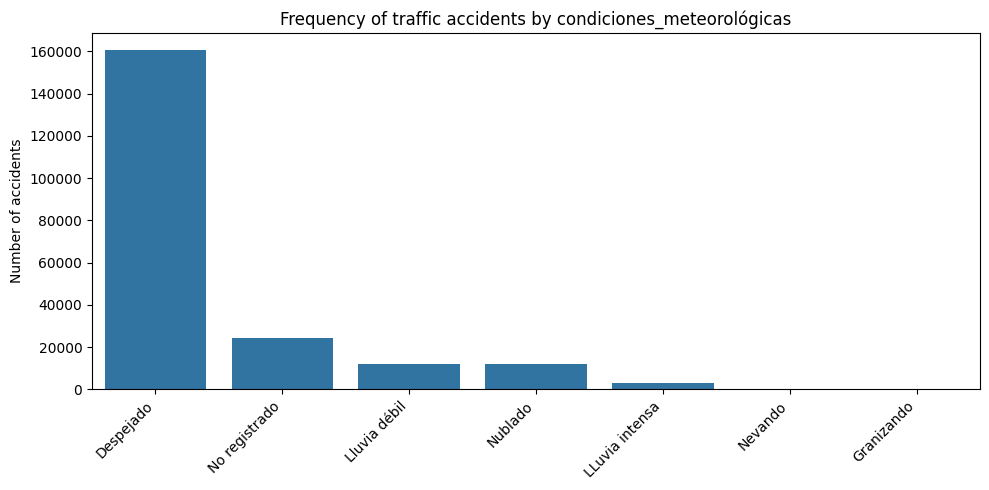

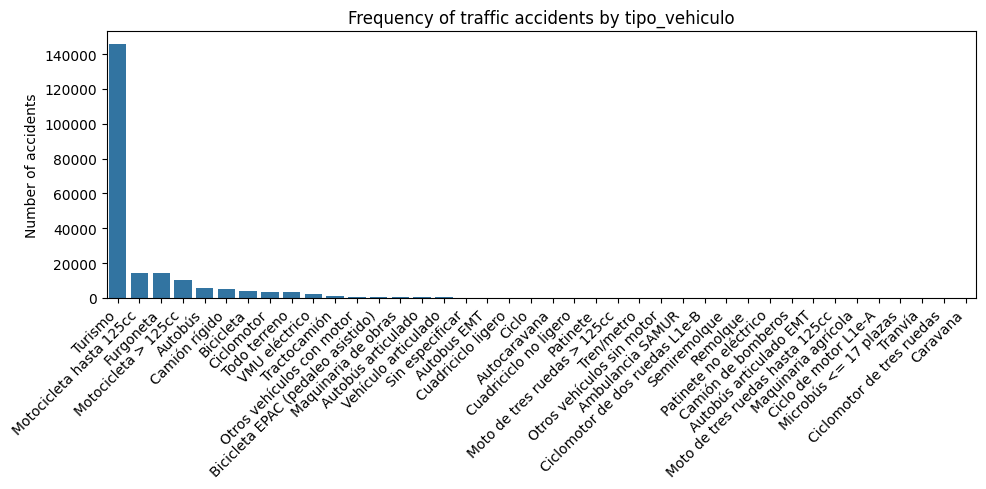

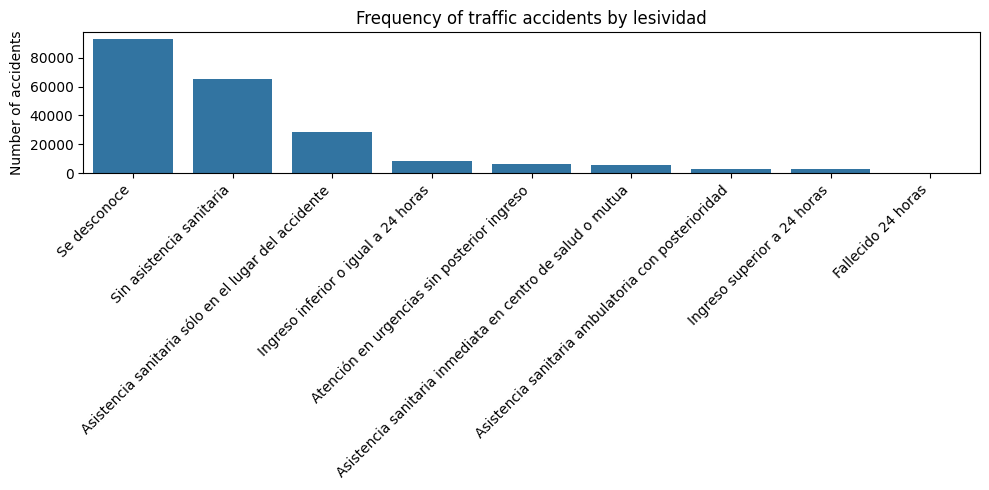

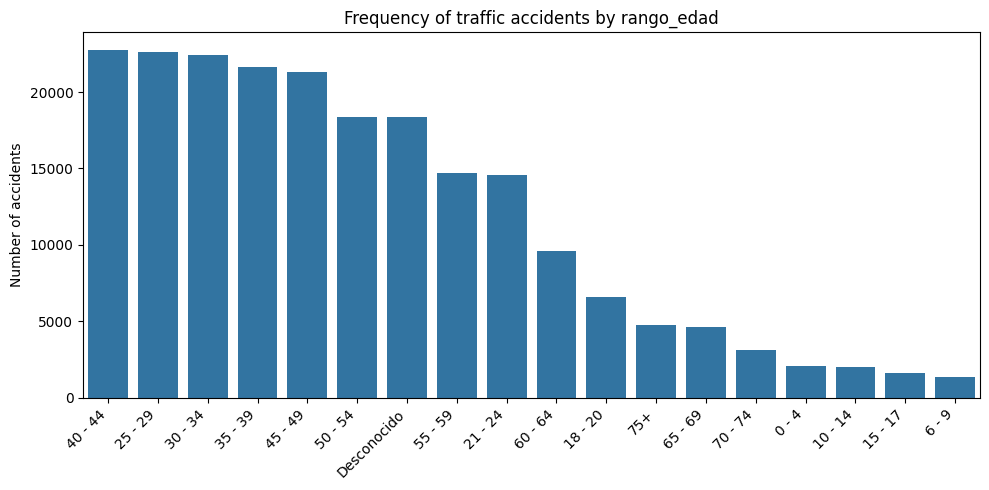

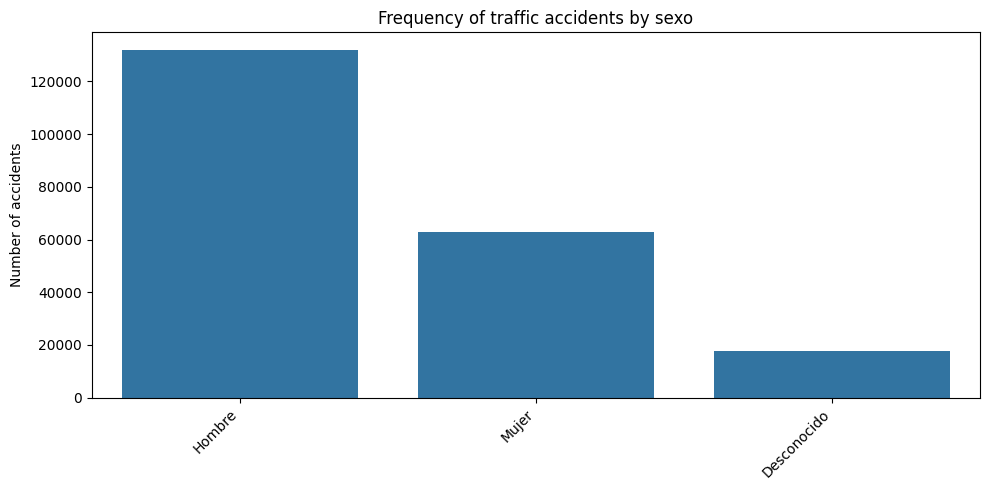

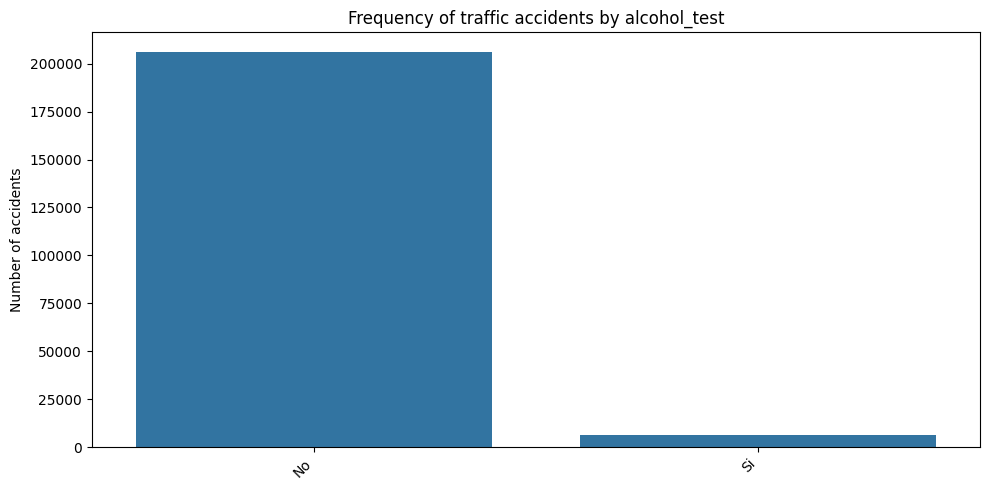

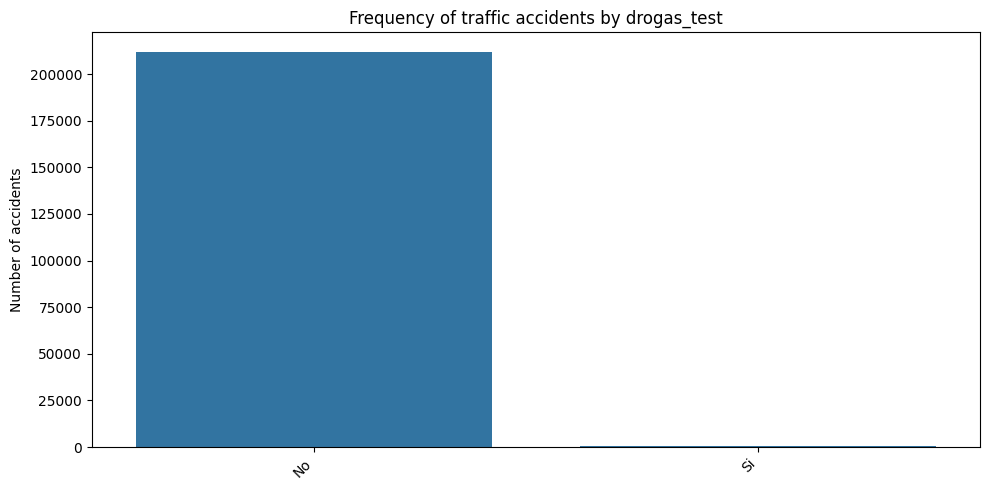

In [422]:
for column in ['distrito', 'tipo_accidente' ,'condiciones_meteorológicas', 'tipo_vehiculo', 'lesividad', 'rango_edad', 'sexo','alcohol_test', 'drogas_test']:
    plt.figure(figsize=(10, 5))
    sns.countplot(data=df_clean, x=column, order=df_clean[column].value_counts().index)
    plt.xticks(rotation=45, ha='right')
    plt.title(f'Frequency of traffic accidents by {column}')
    plt.ylabel('Number of accidents')
    plt.xlabel('')
    plt.tight_layout()
    plt.show()

### Timeseries Visualization

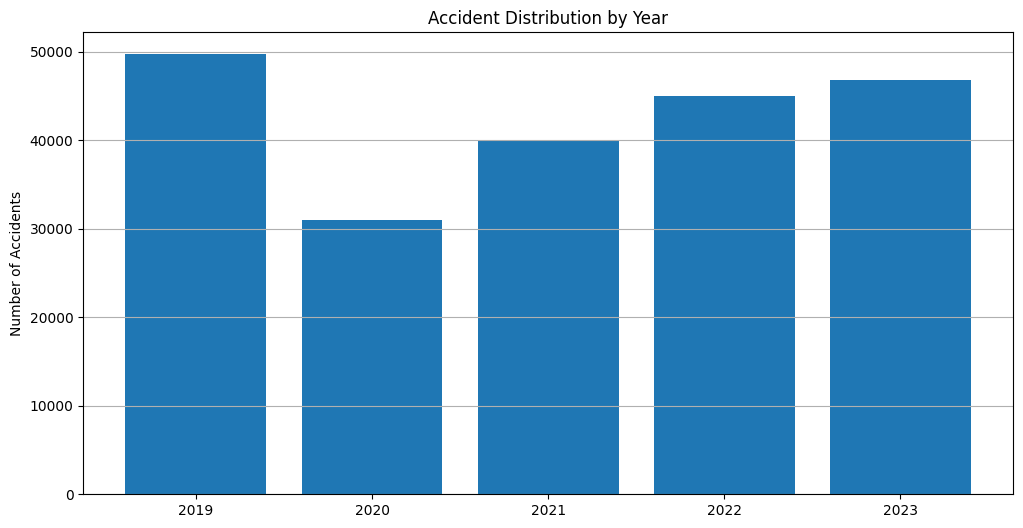

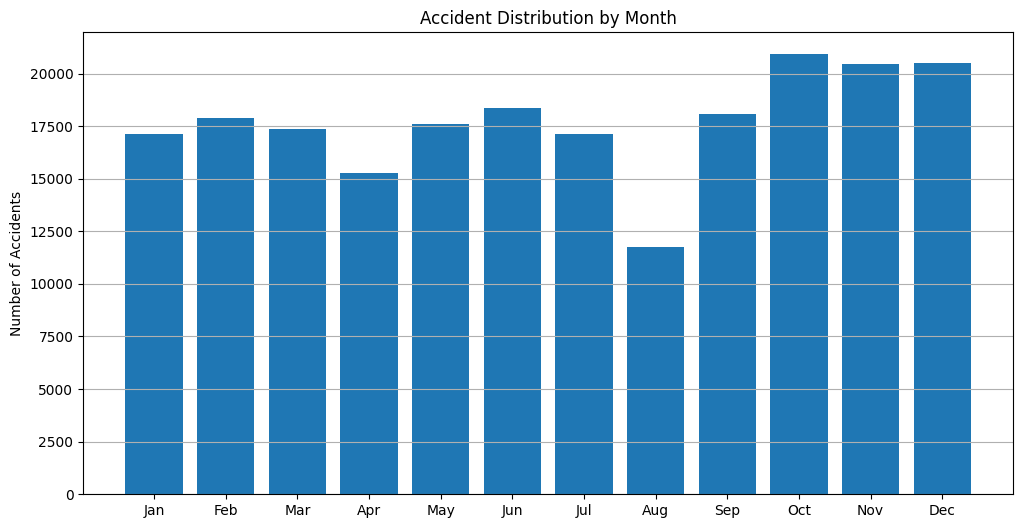

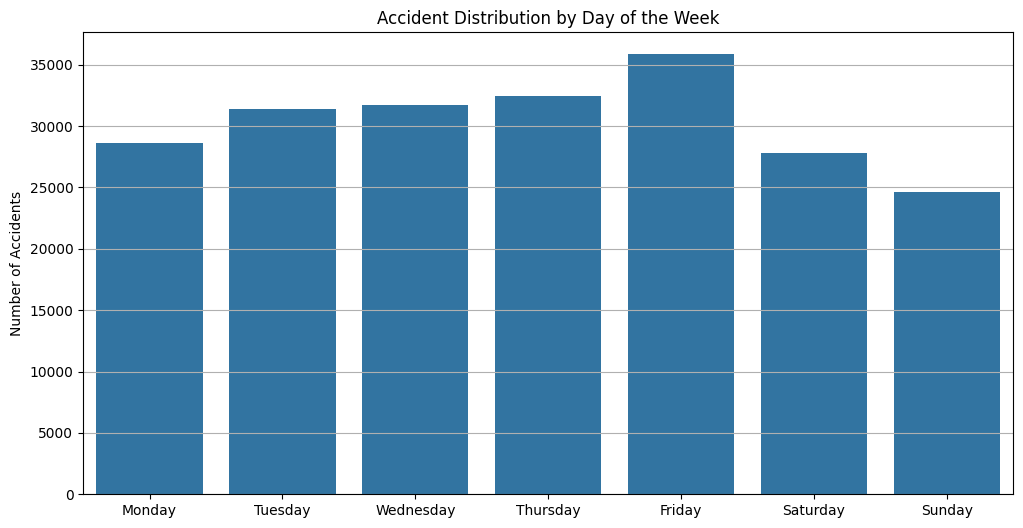

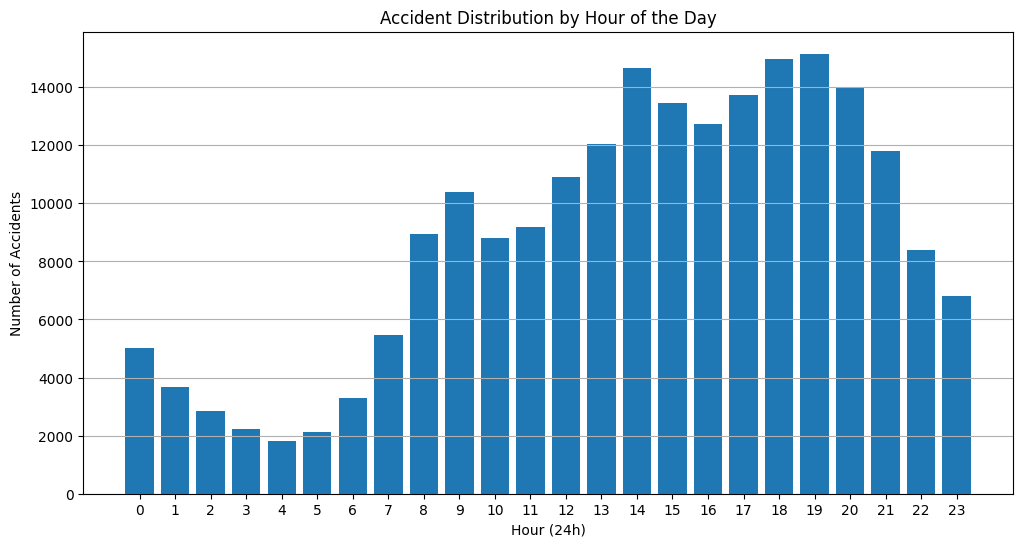

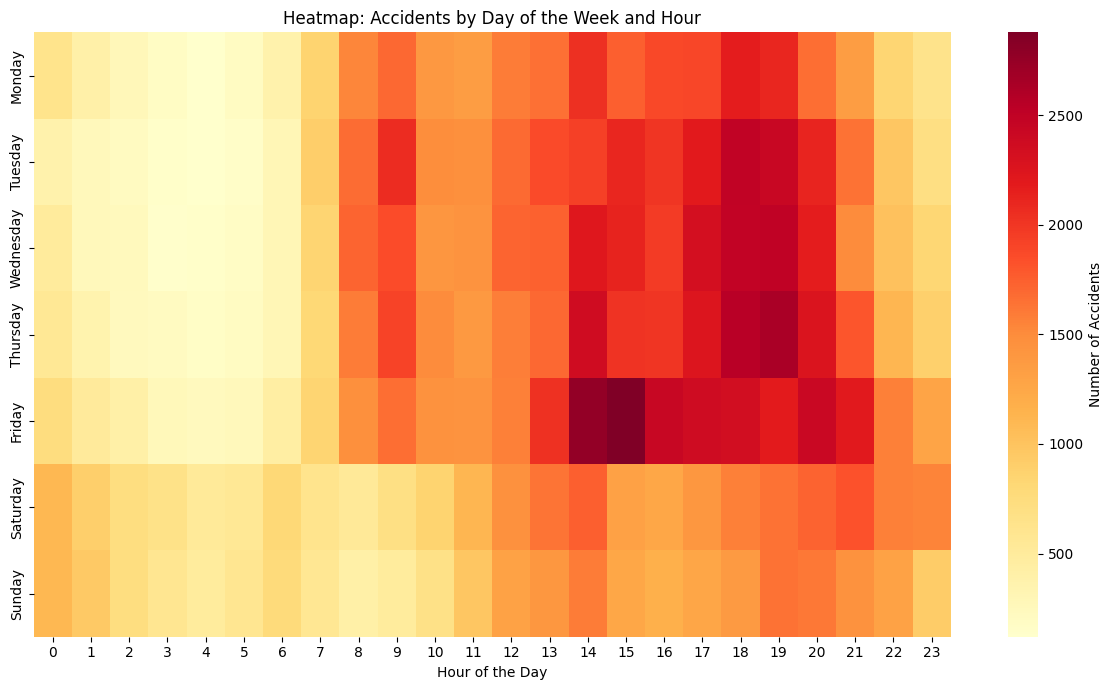

In [435]:
import matplotlib.dates as mdates

df_traffic['fecha'] = pd.to_datetime(df_traffic['fecha'])
df_traffic['month'] = df_traffic['fecha'].dt.month
df_traffic['year'] = df_traffic['fecha'].dt.year
df_traffic['day_of_week'] = df_traffic['fecha'].dt.day_name()
df_traffic['hour'] = df_traffic['hora_24h'].str.split(':').str[0].astype(int)

# By month
accidents_per_month = df_traffic.groupby(['year', 'month']).size().reset_index(name='count')
# Create full date
accidents_per_month['full_date'] = pd.to_datetime(accidents_per_month['year'].astype(str) + '-' + 
                                                   accidents_per_month['month'].astype(str) + '-01')
# Year distribution
plt.figure(figsize=(12, 6))
year_counts = df_traffic['year'].value_counts().sort_index()
plt.bar(year_counts.index, year_counts.values)
plt.title('Accident Distribution by Year')
plt.xlabel('')
plt.ylabel('Number of Accidents')
plt.grid(axis='y')
plt.show()

# Frequency analysis by month
plt.figure(figsize=(12, 6))
month_counts = df_traffic['month'].value_counts().sort_index()
plt.bar(month_counts.index, month_counts.values)
plt.title('Accident Distribution by Month')
plt.xlabel('')
plt.ylabel('Number of Accidents')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
                          'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(axis='y')
plt.show()

# Weekday distribution
plt.figure(figsize=(12, 6))
order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

sns.countplot(data=df_traffic, x='day_of_week', order=order)
plt.title('Accident Distribution by Day of the Week')
plt.xlabel('')
plt.ylabel('Number of Accidents')
plt.grid(axis='y')
plt.show()

# Hourly distribution
plt.figure(figsize=(12, 6))
hour_counts = df_traffic['hour'].value_counts().sort_index()
plt.bar(hour_counts.index, hour_counts.values)
plt.title('Accident Distribution by Hour of the Day')
plt.xlabel('Hour (24h)')
plt.ylabel('Number of Accidents')
plt.xticks(range(0, 24))
plt.grid(axis='y')
plt.show()


# Combining day of week and hour
heatmap_data = pd.crosstab(df_traffic['day_of_week'], df_traffic['hour'])

if 'Monday' in heatmap_data.index:
    heatmap_data = heatmap_data.reindex(order)
# Visualize
plt.figure(figsize=(12, 7))
sns.heatmap(heatmap_data, cmap="YlOrRd", annot=False, cbar_kws={'label': 'Number of Accidents'})
plt.title('Heatmap: Accidents by Day of the Week and Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('')
plt.tight_layout()
plt.show()
